In [ ]:
+#mounting drive 
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#train data reading
import pandas as pd
X_train=pd.read_csv('/drive/My Drive/project/dataset/new/train_X.csv',index_col=0)
y_train=pd.read_csv('/drive/My Drive/project/dataset/new/train_y.csv',index_col=0)
X_test=pd.read_csv('/drive/My Drive/project/dataset/new/test_X.csv',index_col=0)
y_test=pd.read_csv('/drive/My Drive/project/dataset/new/test_y.csv',index_col=0)

In [ ]:
hidden_units1 = 20
hidden_units2 = 40
hidden_units3 = 30
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
      model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
      ])
      return model


In [ ]:
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import statistics
from sklearn.metrics import mean_squared_log_error


def classifier(s):
    global X_train,y_train,X_test,y_test
    print(s)
    p=pd.DataFrame()
    q=pd.DataFrame()
    count=0
    x=(nf+2)-len(s)
    while(x>0):
        count=count+1
        x=x-1
    for i , digit in enumerate(s): #selecting columns with value 1
       if(i>1):
           #print("digit",digit)
           if(digit=='1'):
                count+=1
                m=pd.DataFrame(X_train.iloc[:,count-1])
                o=pd.DataFrame(X_test.iloc[:,count-1])
                p=pd.concat([p,m],axis=1)
                q=pd.concat([q,o],axis=1)
           else:
                count+=1
    print(p.shape)
    model = build_model_using_sequential()
    msle = MeanSquaredLogarithmicError()
    model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle])
    # train the model
    history = model.fit(
    p.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2)
    #score=statistics.mean(history.history['val_mean_squared_logarithmic_error'])
    plot_history(history, 'mean_squared_logarithmic_error')
    #y_pred contains yield predicted by classifier 
    y_pred = model.predict(q.values)
    print ( " Test data's yield : ",y_pred)
    #y_test['hg/ha_yield'] is the yield value given in dataset 
    score=mean_squared_log_error(y_test['hg/ha_yield'], y_pred)
    #myplot(y_test['hg/ha_yield'], y_pred)
    print(score)
    return score

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

In [ ]:
#def myplot(true_value,predicted_value):

  #print(true_value)
  #print("****")
  #print(predicted_value)
  #plt.figure(figsize=(10,10))
  #plt.scatter(true_value, predicted_value, c='crimson')
  #plt.yscale('log')
  #plt.xscale('log')

  #p1 = max(max(predicted_value), max(true_value))
  #p2 = min(min(predicted_value), min(true_value))
  #plt.plot([p1, p2], [p1, p2], 'b-')
  #plt.xlabel('True Values', fontsize=15)
  #plt.ylabel('Predictions', fontsize=15)
  #plt.axis('equal')
  #plt.show()

In [ ]:
nf=6
def main():
    s='0b100111'
    score=classifier(s)
    #print(score)

0b100111
(7975, 4)
Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 37.6315 - mean_squared_logarithmic_error: 37.5395 - val_loss: 8.0687 - val_mean_squared_logarithmic_error: 8.0691
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 4.5895 - mean_squared_logarithmic_error: 4.5830 - val_loss: 2.2607 - val_mean_squared_logarithmic_error: 2.2612
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 1.9177 - mean_squared_logarithmic_error: 1.9164 - val_loss: 1.3179 - val_mean_squared_logarithmic_error: 1.3184
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.4997 - mean_squared_logarithmic_error: 1.5002 - val_loss: 1.2807 - val_mean_squared_logarithmic_error: 1.2813
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 1.4665 - mean_squared_logarithmic_error: 1.4668 - val_loss: 1.2816 - val_mean_squared_logarithmic_error: 1.2822
Epoch 6/10
100/100 [=============================

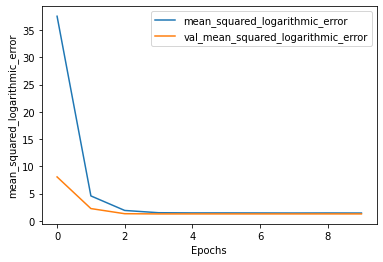

 Test data's yield :  [[30673.299]
 [51552.195]
 [31997.14 ]
 ...
 [32600.723]
 [40301.754]
 [36655.   ]]
1.3847312542306216


In [ ]:
if __name__=="__main__":
    main()